# Notebook for the study of the E.Coli Core model

# <font color='red'> [0] Build the model of E.Coli Core </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

## <font color='green'> [0.2] Creation of the model variable and read the SBTab file </font> 

In [2]:
model = MODEL()

SBTab_file = "../Exemples/SBTab/Model.tsv"
model.read_SBtab(filepath=SBTab_file)

## <font color='green'> [0.3] Read of premade options files </font> 

Options file can be read to add enzymes to every reaction, to consider them and the external metabolites as parameters of the model.

In [3]:
file_path = "../Exemples/SBTab/options.csv"
model.setup(file_path=file_path)

Name of the removed parameter : Temperature


The same for adding regulation arrows between metabolite and flux of the model.

In [4]:
file_reg = "../Exemples/SBTab/e_coli_core_regulation.tsv"
model.regulations.read_file(file_path=file_reg)

In [5]:
model.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated
direct inhibition f6p_c -> PFK,PFK,f6p_c,-1,allosteric,True
direct activation g6p_c -> PYK,PYK,g6p_c,1,allosteric,True


## <font color='green'> [0.4] Display the Escher map of E.Coli Core </font> 

We can display the reference state in a Escher map

In [6]:
model_path = "../Exemples/SBTab/e_coli_core_model.json"
map_path = "../Exemples/SBTab/e_coli_core_map.json"

In [7]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.95062685, 'coa_c': 2.74, 'nad_c': 4.2256266, 'accoa_c': 1.21…

# <font color='red'> [1] Launch simulation </font> 

## <font color='green'> [1.1] Response matrix </font> 

Once your model is well-built and the elasticity matrices are well-defined, you can compute the linear response matrix $R$ of the system to parameter perturbation

In [8]:
model.R

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,h_e_para,co2_e_para,for_e_para,fum_e_para,glc_e_para,h2o_e_para,nh4_e_para,o2_e_para,pi_e_para,succ_e_para
acald_c,-0.582756,1.417244,0.149806,-0.078272,-0.078272,0.149806,0.012038,-0.002391,0.108961,-0.004327,...,0.295825,-0.181478,-0.037829,0.026517,0.067108,-0.077023,-0.011812,-0.009901,0.037560,0.081149
coa_c,-0.178168,-0.178168,-0.072259,0.099207,0.099207,-0.072259,-0.006222,-0.072686,-0.049485,0.013485,...,-0.617051,0.005609,0.106432,-0.205560,-0.017726,0.358551,0.036814,0.046334,-0.025593,-0.237123
nad_c,-0.206554,-0.206554,0.003410,-0.158651,-0.158651,0.003410,-0.017071,-0.079973,-0.069317,-0.001223,...,0.584092,0.188003,-0.077897,0.112168,-0.030104,-0.129423,-0.003338,-0.043078,0.005814,-0.038161
accoa_c,0.295821,0.295821,0.206208,-0.347032,-0.347032,0.206208,0.012348,-0.226025,0.094550,0.000453,...,0.161269,-0.036429,-0.103153,0.060416,0.069897,-0.134276,0.001236,0.006693,0.073708,-0.144151
h_c,-0.052609,-0.052609,0.027964,-0.027606,-0.027606,0.027964,-0.028636,-0.011390,-0.064746,0.001933,...,0.981514,0.055089,-0.021866,0.011393,-0.013616,0.079935,0.005278,-0.066316,-0.012553,-0.006994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.002350,-0.002350,-0.033103,-0.028211,-0.028211,-0.033103,-0.008334,-0.168684,-0.005380,-0.002242,...,-0.007534,0.016861,-0.006428,-0.013313,0.022139,-0.015366,-0.006120,-0.004525,0.019445,0.009787
TALA,-0.007080,-0.007080,-0.002328,-0.015697,-0.015697,-0.002328,-0.005753,-0.013084,-0.013321,0.000244,...,-0.011001,0.002179,-0.003947,-0.000866,0.009455,-0.006879,0.000665,-0.000821,0.006028,-0.000857
TKT1,-0.007080,-0.007080,-0.002328,-0.015697,-0.015697,-0.002328,-0.005753,-0.013084,-0.013321,0.000244,...,-0.011001,0.002179,-0.003947,-0.000866,0.009455,-0.006879,0.000665,-0.000821,0.006028,-0.000857
TKT2,-0.007529,-0.007529,-0.001363,-0.015327,-0.015327,-0.001363,-0.003509,-0.013592,-0.008479,0.000015,...,-0.009366,0.002698,-0.003803,-0.001059,0.009935,-0.007420,0.000040,-0.000974,0.006665,-0.001309


## <font color='green'> [1.2] Covariance matrix </font> 

The uncertainty on the parameters spreads through the cell and then leads to a certain variability in the internal components of the cell's metabolism

In [9]:
model.rho()

,enzyme_ACALD_para,enzyme_ACALDt_para,enzyme_ACKr_para,enzyme_ACONTa_para,enzyme_ACONTb_para,enzyme_ACt2r_para,enzyme_ADK1_para,enzyme_AKGDH_para,enzyme_ATPM_para,enzyme_Biomass_Ecoli_core_w_GAM_para,...,PYK,RPE,RPI,SUCCt2_2,SUCCt3,SUCOAS,TALA,TKT1,TKT2,TPI
enzyme_ACALD_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.057282,-0.058804,0.046321,-0.006439,0.128015,-0.005600,-0.056851,-0.056851,-0.060684,-0.081884
enzyme_ACALDt_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.057282,-0.058804,0.046321,-0.006439,0.128015,-0.005600,-0.056851,-0.056851,-0.060684,-0.081884
enzyme_ACKr_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.061589,-0.014858,0.036885,-0.096602,0.037752,-0.078890,-0.018698,-0.018698,-0.010983,-0.019944
enzyme_ACONTa_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006006,-0.124876,0.129288,-0.032278,0.097742,-0.067231,-0.126050,-0.126050,-0.123527,0.042175
enzyme_ACONTb_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006006,-0.124876,0.129288,-0.032278,0.097742,-0.067231,-0.126050,-0.126050,-0.123527,0.042175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUCOAS,-0.005600,-0.005600,-0.078890,-0.067231,-0.067231,-0.078890,-0.019863,-0.402005,-0.012821,-0.005343,...,0.231172,0.291768,-0.239403,0.044615,-0.085957,1.000000,0.283726,0.283726,0.299441,-0.158223
TALA,-0.056851,-0.056851,-0.018698,-0.126050,-0.126050,-0.018698,-0.046193,-0.105065,-0.106965,0.001956,...,0.165658,0.999319,-0.983998,0.074228,0.062132,0.283726,1.000000,1.000000,0.997269,-0.259769
TKT1,-0.056851,-0.056851,-0.018698,-0.126050,-0.126050,-0.018698,-0.046193,-0.105065,-0.106965,0.001956,...,0.165658,0.999319,-0.983998,0.074228,0.062132,0.283726,1.000000,1.000000,0.997269,-0.259769
TKT2,-0.060684,-0.060684,-0.010983,-0.123527,-0.123527,-0.010983,-0.028281,-0.109549,-0.068341,0.000118,...,0.200656,0.999314,-0.968151,0.078951,0.070543,0.299441,0.997269,0.997269,1.000000,-0.293931


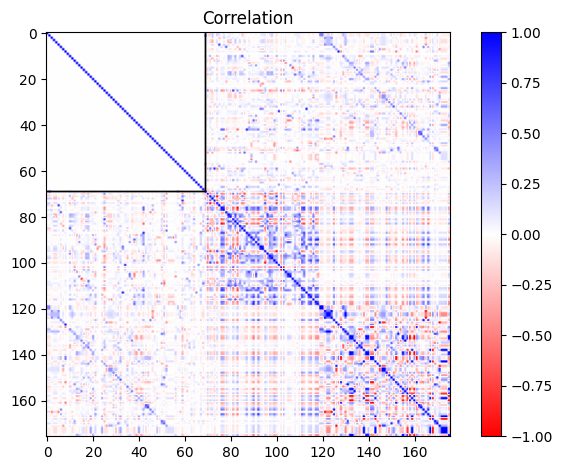

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7782fdbb73d0>)

In [10]:
model.plot(result="rho")

In [11]:
model.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated
direct inhibition f6p_c -> PFK,PFK,f6p_c,-1,allosteric,True
direct activation g6p_c -> PYK,PYK,g6p_c,1,allosteric,True


In [12]:
model.regulations.inactivate(name="direct inhibition f6p_c -> PFK")

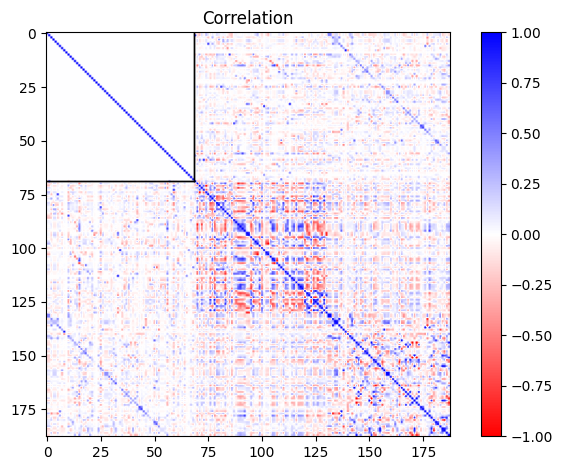

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Correlation'}>,
 <matplotlib.image.AxesImage at 0x7782fc046770>)

In [13]:
model.plot("rho")

and the mutual information

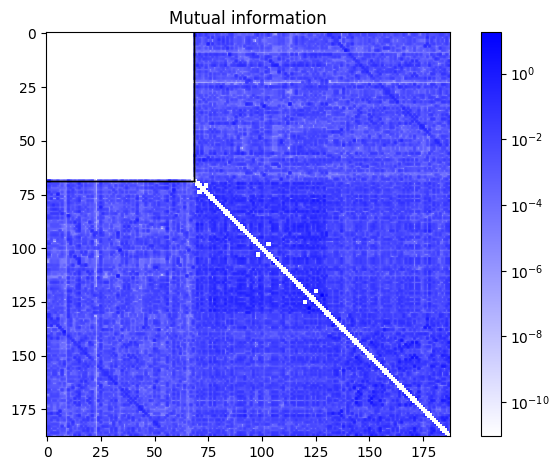

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Mutual information'}>,
 <matplotlib.image.AxesImage at 0x7782fc0b7910>)

In [14]:
model.plot(result="MI")

For a clearer analysis, you can display an Escher map of the mutual inforamtion between an element of the model and the metabolite

In [15]:
model.escher_meta(studied="enzyme_ACALD_para", result="MI", model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.02692711771298463, 'coa_c': 0.007225274349188202, 'nad_c': 0…

You can study the influence of the resolution of uncertainty of an element of the model by fixing its value

In [16]:
SD, mean = model.group_entropy_fixed_vector(elements_to_fixe="atp_c", elements_to_study=[], new_mean_fixed=4.0, return_all=True)

SD

,Old SD,New SD,Delta SD
enzyme_ACALD_para,1.000000,0.997323,2.676948e-03
enzyme_ACALDt_para,1.000000,0.999069,9.313731e-04
enzyme_ACKr_para,1.000000,1.000000,1.599743e-07
enzyme_ACONTa_para,1.000000,0.998890,1.109680e-03
enzyme_ACONTb_para,1.000000,0.996385,3.615285e-03
...,...,...,...
SUCOAS,0.608676,0.606002,2.673269e-03
TALA,0.143460,0.142784,6.765295e-04
TKT1,0.156920,0.154404,2.516534e-03
TKT2,0.235314,0.235310,4.483113e-06


In [17]:
model.group_entropy_fixed_vector(elements_to_fixe=["atp_c"], elements_to_study=[], new_mean_fixed=[4.0])

,Old H,New H,Delta H
enzyme_ACALD_para,1.918939,1.916258,-0.002681
enzyme_ACALDt_para,1.918939,1.918007,-0.000932
enzyme_ACKr_para,1.918939,1.918938,-0.0
enzyme_ACONTa_para,1.918939,1.917828,-0.00111
enzyme_ACONTb_para,1.918939,1.915317,-0.003622
...,...,...,...
SUCOAS,1.422469,1.418067,-0.004402
TALA,-0.022759,-0.027486,-0.004727
TKT1,0.066921,0.050754,-0.016167
TKT2,0.472104,0.472085,-0.000019


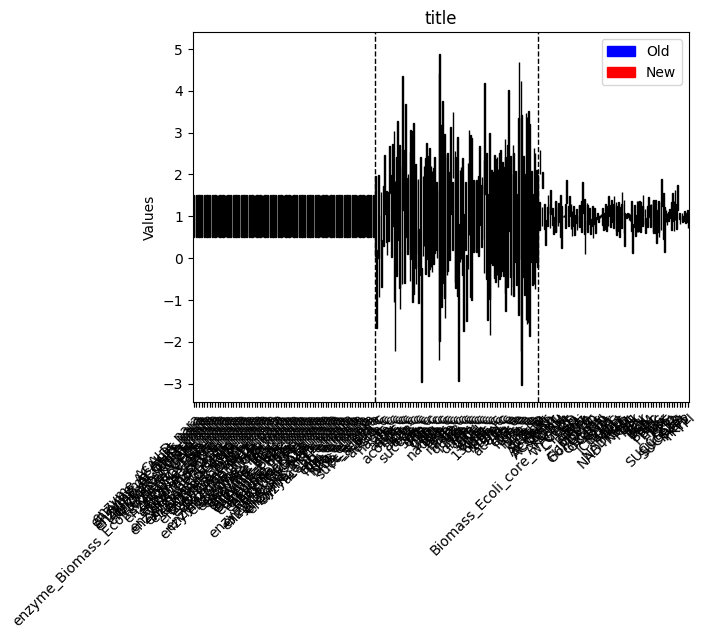

In [18]:
model.graphic_interface()

In [19]:
model.escher_mean_deviation(fixed_element="atp_c", fixed_value=4.0, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'acald_c': 0.09994334443632263, 'coa_c': 0.06231407482273088, 'nad_c': 0.…

### We can also regroup enzyme into operon

In [20]:
enzyme_gly = ["PFK", "FBA", "TPI", "GAPD", "PGK", "PGM", "PYK"]

for i in range(len(enzyme_gly)) :
    enzyme_gly[i] = "enzyme_" + enzyme_gly[i]

model.operons.add(name="Glycolyse", enzymes_linked=enzyme_gly , mixed_covariance=0.5)


enzyme_phosphate = ["G6PDH2r", "GND", "TALA", "TKT2"]

for i in range(len(enzyme_phosphate)) :
    enzyme_phosphate[i] = "enzyme_" + enzyme_phosphate[i]

model.operons.add(name="pentose phosphate", enzymes_linked=enzyme_phosphate , mixed_covariance=0.5)

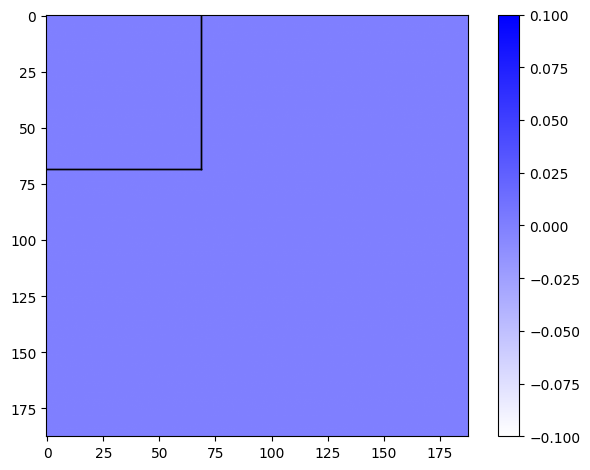

In [21]:
rho_0 = model.rho().to_numpy()

model.operons.inactivate("Glycolyse")
model.operons.inactivate("pentose phosphate")

rho_1 = model.rho().to_numpy()

index = columns = model.covariance.index
matrix = rho_0 - rho_1

mini = np.min(matrix)
maxi = np.max(matrix)
fig, ax = plt.subplots()

custom_map = matplotlib.colors.LinearSegmentedColormap.from_list("custom", ["white", "blue"])
im = plt.imshow(np.abs(matrix), cmap=custom_map, vmin=0, vmax=maxi)
fig.tight_layout()

# Plot of the black line to separate the parameters from the variables
# Width of the line
line_width = 1
# Number of parameters
N_para = model.parameters.df.shape[0]
# Position of the line
x_p_e = [-0.5, N_para - 0.5]
y_p_e = [N_para - 0.5, N_para - 0.5]
plt.plot(x_p_e, y_p_e, "black", linewidth=line_width)
plt.plot(y_p_e, x_p_e, "black", linewidth=line_width)

x_p = [-0.5, N_para - 0.5]
y_p = [N_para - 0.5, N_para - 0.5]
plt.plot(x_p, y_p, "black", linewidth=line_width)
plt.plot(y_p, x_p, "black", linewidth=line_width)

plt.colorbar()
plt.show()
